In [2]:
import pymssql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn import linear_model

# Creating Dataframe:

In [4]:
connection = pymssql.connect('gen10-data-fundamentals-22-07-sql-server.database.windows.net', 'jerad', 'F1N4NC3-1', 'capstone-finance-group1')

query = f'SELECT State, Year, HighSchoolDiploma, BachelorsDegree, GeneralRevenue, PropertyTax, AlcoholTax, InsurancePremiumTax, MotorFuelsTax, PublicUtilityTax, TobaccoTax, IndividualIncomeTax, LiquorStoreRevenue, UnemploymentRevenue, UnempPayrollTax, PoliceFireExpenses, TotalCorrectionalExpenses, TotalEducationExpenses, TotalHigherEdExpenses, EducationAssistanceExpenses, HealthExpenses, PublicWelfareExpenses, UnemploymentExpenses, TotalDebt, Party, [Property Crime Rates], [Violent Crime Rates], [Drug Overdose Deaths], [Unemployment Percentage Rate], PovertyPerc FROM StateYear k JOIN State s on s.StateId = k.StateId JOIN Year y on y.YearId = k.YearId LEFT JOIN StateFinances f on f.StateYearId = k.StateYearId LEFT JOIN StatePolitics p on p.StateYearId = k.StateYearId LEFT JOIN Party x on x.PartyId = p.PartyId LEFT JOIN StateDrug d on d.StateYearId = k.StateYearId LEFT JOIN StateUnemployment u on u.StateYearId = k.StateYearId LEFT JOIN StatePoverty z on z.StateYearId = k.StateYearId LEFT JOIN StateCrime c on c.StateYearId = k.StateYearId LEFT JOIN Education educ on educ.StateYearID = k.StateYearID'
df = pd.read_sql(query, connection)
df = df.rename(columns={"Drug Overdose Deaths": "DrugOverdoseDeaths", "Unemployment Percentage Rate": "UnemploymentPercentageRate", "Property Crime Rates": "PropertyCrimeRates", "Violent Crime Rates": "ViolentCrimeRates"})
df = df.replace({'NSD': None})
df

,State,Year,HighSchoolDiploma,BachelorsDegree,GeneralRevenue,PropertyTax,AlcoholTax,InsurancePremiumTax,MotorFuelsTax,PublicUtilityTax,...,HealthExpenses,PublicWelfareExpenses,UnemploymentExpenses,TotalDebt,Party,PropertyCrimeRates,ViolentCrimeRates,DrugOverdoseDeaths,UnemploymentPercentageRate,PovertyPerc
0,Alabama,1995,74.400002,17.299999,4183.0,47.0,41.0,61.0,181.0,149.0,...,188.0,902.0,123.0,1486.0,Dem,4215.700195,632.4,NaN,6.0,17.600000
1,Alaska,1995,92.099998,25.200001,20675.0,161.0,34.0,79.0,111.0,7.0,...,244.0,1522.0,517.0,9082.0,Rep,4982.899902,770.9,NaN,7.3,10.100000
2,Arizona,1995,82.300003,19.100000,4027.0,127.0,16.0,49.0,173.0,33.0,...,152.0,778.0,100.0,1164.0,Rep,7500.100098,713.5,NaN,5.3,16.299999
3,Arkansas,1995,76.199997,14.200000,4332.0,4.0,18.0,47.0,221.0,0.0,...,161.0,1017.0,191.0,1328.0,Dem,4137.700195,553.2,NaN,4.8,18.200001
4,California,1995,79.599998,24.200001,5050.0,170.0,15.0,55.0,145.0,2.0,...,122.0,691.0,285.0,2582.0,Dem,4865.100098,966.0,NaN,7.9,16.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,Virginia,2020,90.300003,39.500000,7317.0,4.0,31.0,64.0,128.0,60.0,...,144.0,1754.0,200.0,3399.0,Dem,1456.400024,208.7,26.600000,6.2,9.200000
1322,Washington,2020,91.699997,36.700001,7123.0,484.0,54.0,90.0,203.0,76.0,...,406.0,1790.0,471.0,3842.0,Dem,2732.399902,293.7,22.000000,8.5,9.500000
1323,West Virginia,2020,87.599998,21.299999,8318.0,4.0,10.0,72.0,239.0,77.0,...,143.0,2784.0,277.0,6496.0,Rep,1399.400024,355.9,81.400002,8.2,15.800000
1324,Wisconsin,2020,92.599998,30.799999,7082.0,17.0,11.0,41.0,187.0,60.0,...,69.0,2077.0,178.0,3809.0,Rep,1485.699951,323.4,27.700001,6.3,10.000000


In [3]:
# Changing numeric objects to float

df.Year = df.Year.astype(float)
df.GeneralRevenue = df.GeneralRevenue.astype(float)
df.PropertyTax = df.PropertyTax.astype(float)
df.AlcoholTax = df.AlcoholTax.astype(float)
df.InsurancePremiumTax = df.InsurancePremiumTax.astype(float)
df.MotorFuelsTax = df.MotorFuelsTax.astype(float)
df.PublicUtilityTax = df.PublicUtilityTax.astype(float)
df.TobaccoTax = df.TobaccoTax.astype(float)
df.IndividualIncomeTax = df.IndividualIncomeTax.astype(float)
df.LiquorStoreRevenue = df.LiquorStoreRevenue.astype(float)
df.UnemploymentRevenue = df.UnemploymentRevenue.astype(float)
df.UnempPayrollTax = df.UnempPayrollTax.astype(float)
df.PoliceFireExpenses = df.PoliceFireExpenses.astype(float)
df.TotalCorrectionalExpenses = df.TotalCorrectionalExpenses.astype(float)
df.TotalHigherEdExpenses = df.TotalHigherEdExpenses.astype(float)
df.TotalEducationExpenses = df.TotalEducationExpenses.astype(float)
df.EducationAssistanceExpenses = df.EducationAssistanceExpenses.astype(float)
df.HealthExpenses = df.HealthExpenses.astype(float)
df.PublicWelfareExpenses = df.PublicWelfareExpenses.astype(float)
df.UnemploymentExpenses = df.UnemploymentExpenses.astype(float)
df.TotalDebt = df.TotalDebt.astype(float)
df.DrugOverdoseDeaths = df.DrugOverdoseDeaths.astype(float)
df.ViolentCrimeRates = df.ViolentCrimeRates.astype(float)
df.UnemploymentPercentageRate = df.UnemploymentPercentageRate.astype(float)
df.PovertyPerc = df.PovertyPerc.astype(float)

# Feature Engineering

In [5]:
# Initial check for nulls:

print(df.isnull().sum())

# Imputing mean into DrugOverdoseDeaths column data with values 'NSD' (not sufficient data):

df = df.fillna(df.mean())


# Dropping years with missing DrugOverdoseDeaths data (1995-1998):

df = df[df.Year != 1995]
df = df[df.Year != 1996]
df = df[df.Year != 1997]
df = df[df.Year != 1998]

# Dropping District of Colombia:

df = df.dropna()

# Final Check for nulls:

df.isnull().sum()

State                            0
Year                             0
HighSchoolDiploma                0
BachelorsDegree                  0
GeneralRevenue                  26
PropertyTax                     26
AlcoholTax                      26
InsurancePremiumTax             26
MotorFuelsTax                   26
PublicUtilityTax                26
TobaccoTax                      26
IndividualIncomeTax             26
LiquorStoreRevenue              26
UnemploymentRevenue             26
UnempPayrollTax                 26
PoliceFireExpenses              26
TotalCorrectionalExpenses       26
TotalEducationExpenses          26
TotalHigherEdExpenses           26
EducationAssistanceExpenses     26
HealthExpenses                  26
PublicWelfareExpenses           26
UnemploymentExpenses            26
TotalDebt                       26
Party                           26
PropertyCrimeRates               0
ViolentCrimeRates                0
DrugOverdoseDeaths             213
UnemploymentPercenta

C:\Users\Beth Vander Hoek\AppData\Local\Temp\ipykernel_5172\1150808231.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


State                          0
Year                           0
HighSchoolDiploma              0
BachelorsDegree                0
GeneralRevenue                 0
PropertyTax                    0
AlcoholTax                     0
InsurancePremiumTax            0
MotorFuelsTax                  0
PublicUtilityTax               0
TobaccoTax                     0
IndividualIncomeTax            0
LiquorStoreRevenue             0
UnemploymentRevenue            0
UnempPayrollTax                0
PoliceFireExpenses             0
TotalCorrectionalExpenses      0
TotalEducationExpenses         0
TotalHigherEdExpenses          0
EducationAssistanceExpenses    0
HealthExpenses                 0
PublicWelfareExpenses          0
UnemploymentExpenses           0
TotalDebt                      0
Party                          0
PropertyCrimeRates             0
ViolentCrimeRates              0
DrugOverdoseDeaths             0
UnemploymentPercentageRate     0
PovertyPerc                    0
dtype: int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 204 to 1325
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        1100 non-null   object 
 1   Year                         1100 non-null   int64  
 2   HighSchoolDiploma            1100 non-null   float64
 3   BachelorsDegree              1100 non-null   float64
 4   GeneralRevenue               1100 non-null   float64
 5   PropertyTax                  1100 non-null   float64
 6   AlcoholTax                   1100 non-null   float64
 7   InsurancePremiumTax          1100 non-null   float64
 8   MotorFuelsTax                1100 non-null   float64
 9   PublicUtilityTax             1100 non-null   float64
 10  TobaccoTax                   1100 non-null   float64
 11  IndividualIncomeTax          1100 non-null   float64
 12  LiquorStoreRevenue           1100 non-null   float64
 13  UnemploymentReve

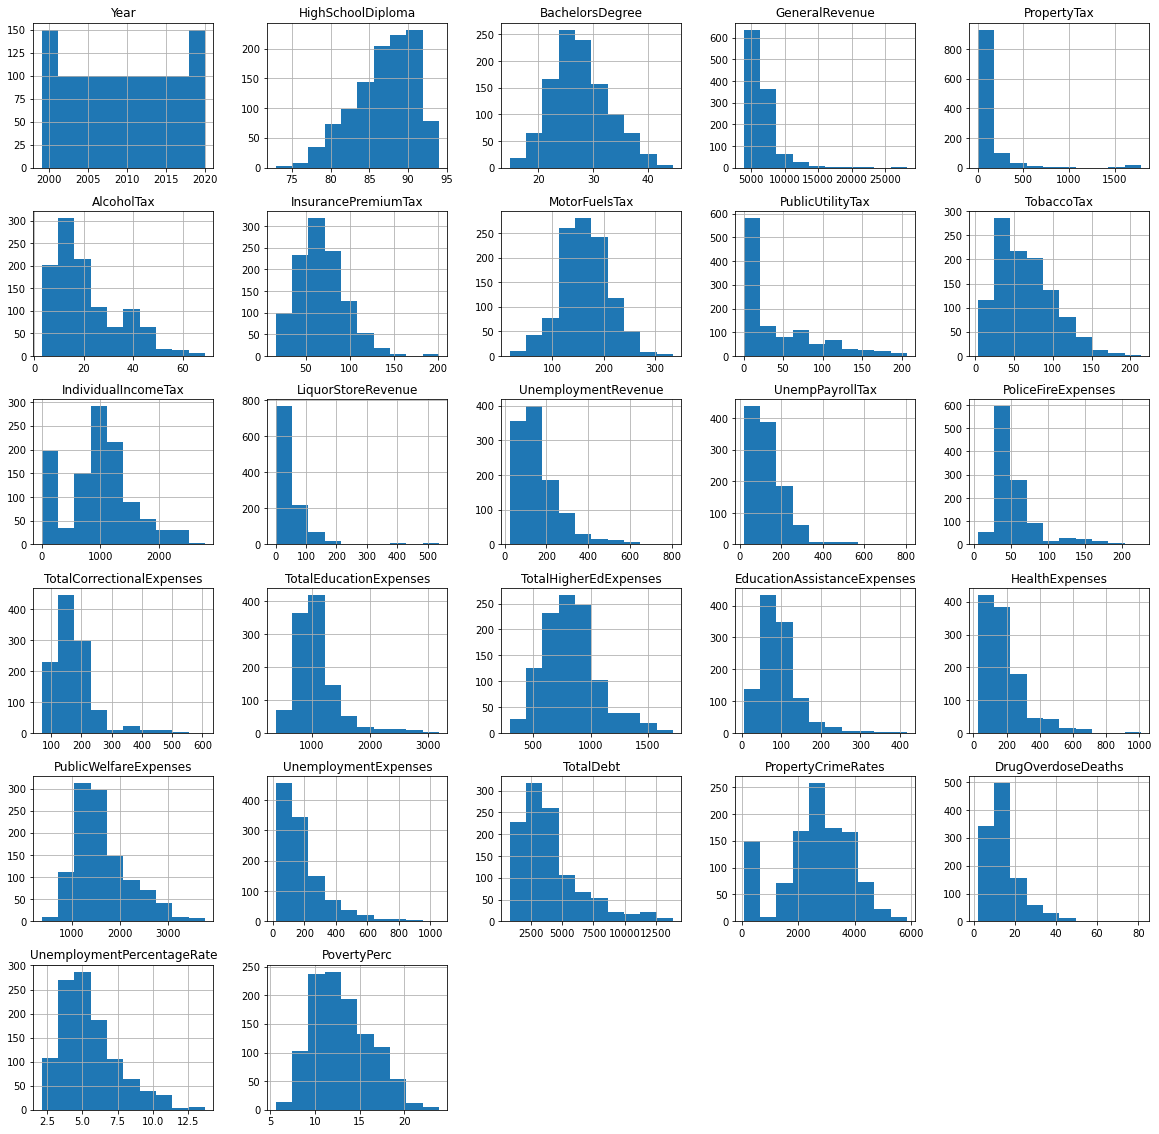

<Figure size 1800x1200 with 0 Axes>

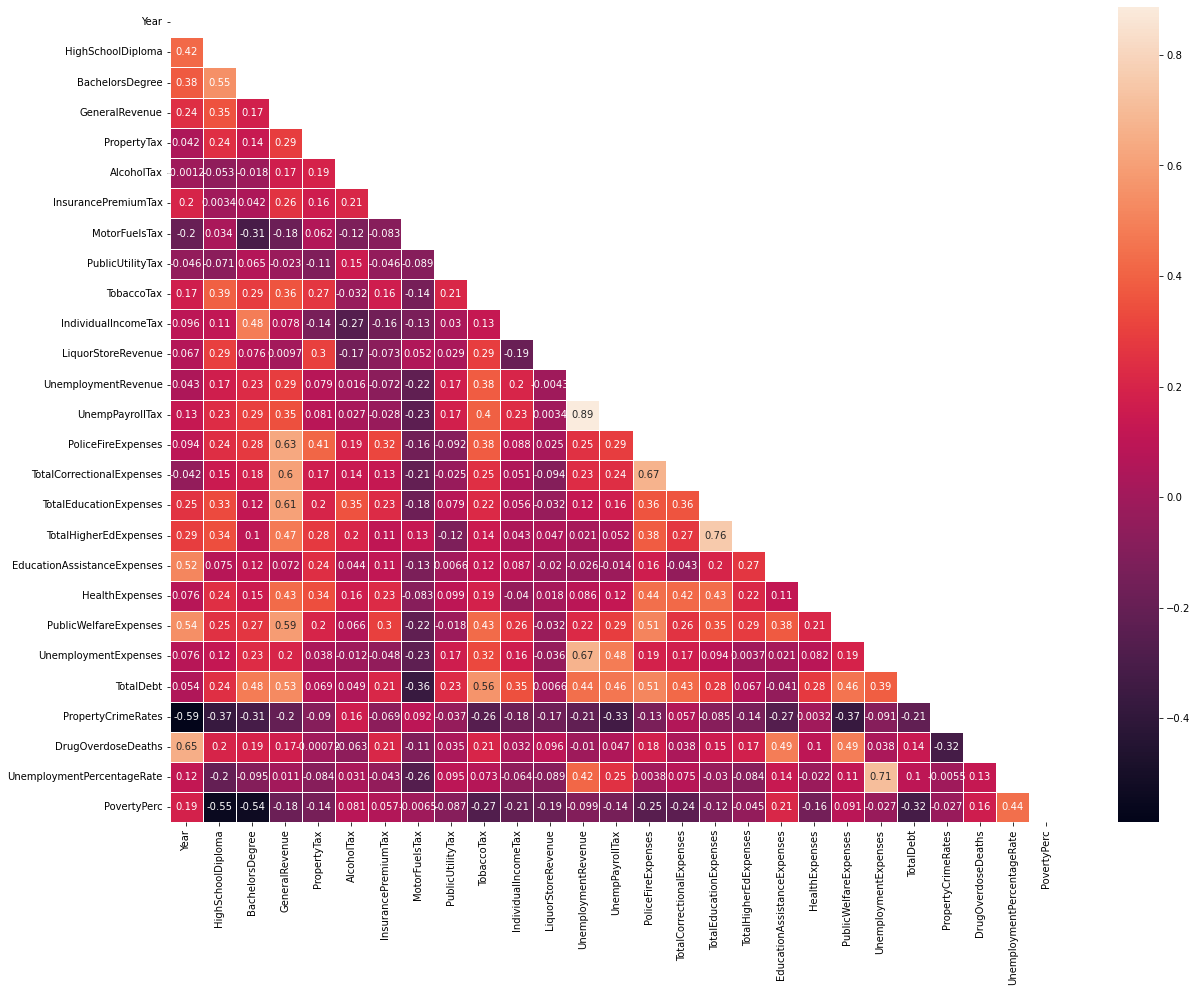

In [6]:
# Looking at data info, corr. matrix does not include states or party

print(df.info())

df.hist(figsize = (20, 20))

plt.figure(dpi=300)
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)
plt.show()

Creating Dummy Variables and Standardize data

In [7]:
# Making dummy variables and dropping party/state columns:

party_dummies = pd.get_dummies(df.Party, prefix='Party').iloc[:, 1:]
state_dummies = pd.get_dummies(df.State, prefix='State').iloc[:, 1:]
new_df_1 = pd.concat([df, party_dummies], axis=1).drop("Party", axis = 1)
new_df = pd.concat([new_df_1, state_dummies], axis=1).drop("State", axis = 1)
print(len(new_df.columns))
new_df.columns

80


Index(['Year', 'HighSchoolDiploma', 'BachelorsDegree', 'GeneralRevenue',
       'PropertyTax', 'AlcoholTax', 'InsurancePremiumTax', 'MotorFuelsTax',
       'PublicUtilityTax', 'TobaccoTax', 'IndividualIncomeTax',
       'LiquorStoreRevenue', 'UnemploymentRevenue', 'UnempPayrollTax',
       'PoliceFireExpenses', 'TotalCorrectionalExpenses',
       'TotalEducationExpenses', 'TotalHigherEdExpenses',
       'EducationAssistanceExpenses', 'HealthExpenses',
       'PublicWelfareExpenses', 'UnemploymentExpenses', 'TotalDebt',
       'PropertyCrimeRates', 'ViolentCrimeRates', 'DrugOverdoseDeaths',
       'UnemploymentPercentageRate', 'PovertyPerc', 'Party_N/A', 'Party_Rep',
       'Party_Split', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky',

In [8]:
# Standardizing the data:

scaler = StandardScaler().fit(new_df)
df_scaled = pd.DataFrame(scaler.transform(new_df))
df_scaled.columns = new_df.columns
df_scaled

,Year,HighSchoolDiploma,BachelorsDegree,GeneralRevenue,PropertyTax,AlcoholTax,InsurancePremiumTax,MotorFuelsTax,PublicUtilityTax,TobaccoTax,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,-1.655032,-1.503691,-1.128195,-0.893163,-0.164825,1.553220,-0.067648,0.224445,2.468443,-1.119717,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
1,-1.655032,1.517258,-0.416670,3.869264,0.096556,0.656387,0.121217,-1.431268,-0.641406,1.448350,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
2,-1.655032,-0.987289,-0.666665,-1.149037,-0.061102,-0.464655,-0.785332,0.371154,-0.600487,-0.409401,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
3,-1.655032,-2.071731,-1.993563,-0.725232,0.698148,-0.389919,-1.049742,1.251406,-0.825542,-0.272801,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
4,-1.655032,-1.684430,-0.108984,-0.450647,0.333044,-0.614127,-0.332058,-0.467182,-0.784623,-0.627960,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.655032,0.871757,2.275586,0.381994,-0.388866,0.731123,-0.143193,-0.739641,0.402030,-1.256316,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857,-0.142857,-0.142857,-0.142857
1096,1.655032,1.233236,1.737135,0.291245,1.602611,2.450053,0.838901,0.832239,0.729382,-0.382081,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857,-0.142857,-0.142857
1097,1.655032,0.174614,-1.224347,0.850238,-0.388866,-0.838335,0.158989,1.586741,0.749842,0.792674,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857,-0.142857
1098,1.655032,1.465617,0.602541,0.272067,-0.334930,-0.763599,-1.011969,0.496904,0.402030,1.284431,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857


# Create Train and Test sets, Create Lasso Model, and Fit Lasso Model

In [9]:
# Declaring variables and getting training/test data:

X = df_scaled.drop("PovertyPerc", axis = 1)
y = df_scaled["PovertyPerc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# Using grid search for ideal Lasso model alpha value:

lasso_params = {'alpha':[0.005, 0.01, 0.05, 0.1, 1]}

model = {'Lasso': GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X, y).best_estimator_}
model

{'Lasso': Lasso(alpha=0.005)}

In [11]:
# Applying Lasso machine learning model

lasso = Lasso(alpha = 0.005)
fit = lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = lasso.score(X_test, y_test)

# Getting Results

r squared: 0.9011404178626604


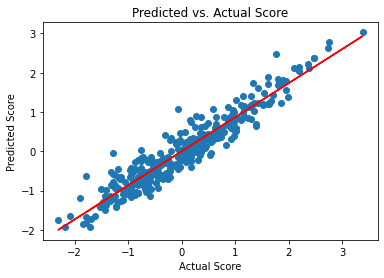

In [12]:
# Finding r squared value and predicted vs actual score for Lasso model:

print(f'r squared: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted vs. Actual Score')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color= 'red')
plt.show()

### Predicted vs Actual  and r squared Results

- With an r squared value of .902, we can confidently say that about 90% of the variation in the poverty percentages on a state level is predicted through our Lasso model using independent variables, some of those being alcohol taxes, crime rates, drug overdoses, etc.
- From our graph displaying the model's predicted scores vs actual poverty values, we can see a fairly linear trend and condensed points along that line, representing the fact that our model was fairly accurate when predicting poverty percetages based on these other previously stated factors.

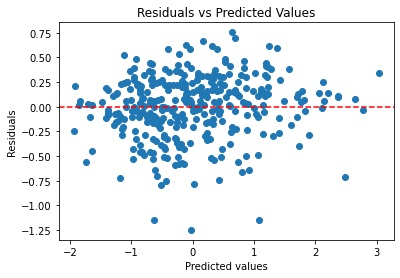

In [13]:
# Finding residuals vs predicted values:

res = y_test - y_pred

plt.scatter(y_pred, res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle="--")
plt.show()

### Residuals vs Predicted Values

- The residuals, that being the difference between actual scores and predicted scores, in this graph above are being compared to our predicted values. We can see that there is a fairly even distribution of scores around zero, where we can see only a few exceptions. This tells us that our results were fairly linear with few outliers from the end model product, representing the fact that choosing a linear model was good decision to predict poverty rates using our particular dataset.

In [14]:
# Finding coefficients and features used by the model:

coef = lasso.coef_
col_names = X.columns
importance = np.abs(coef)
features = np.array(col_names)[importance > 0.2]
print(f'Number of variables used (including dummy variables): {len(features)}\nVariables used:\n')
print(features)
print(f'\nNumber of total variables (including dummy variables): {len(coef)}\nCoefficients:')
coef

Number of variables used (including dummy variables): 3
Variables used:

['Year' 'BachelorsDegree' 'UnemploymentPercentageRate']

Number of total variables (including dummy variables): 79
Coefficients:


array([ 0.28564004, -0.14690944, -0.4501052 , -0.10037771,  0.01464575,
        0.04753851, -0.03172566, -0.05602161,  0.0119942 ,  0.06955695,
       -0.03135115, -0.        ,  0.02377716,  0.05339921, -0.07812698,
       -0.12183439,  0.        ,  0.10492615,  0.        , -0.        ,
       -0.        , -0.05575994,  0.        , -0.10303772, -0.        ,
       -0.        ,  0.27817836, -0.03366599, -0.        , -0.01179608,
       -0.04561699,  0.07425127,  0.03549894,  0.04775251,  0.02317619,
       -0.04878841, -0.        , -0.        ,  0.06486256, -0.08388012,
       -0.02076692, -0.045576  , -0.09729448, -0.10819316, -0.01371236,
        0.02413049,  0.1617335 , -0.03376444, -0.00119741,  0.03443612,
       -0.07551327, -0.07021859,  0.17223983,  0.00693104,  0.0792952 ,
       -0.0014306 , -0.14199254, -0.16536773, -0.08339976,  0.19876492,
        0.09026921,  0.02991997, -0.05590097, -0.04370721,  0.04650103,
        0.02571633, -0.0600555 , -0.01911833,  0.00805611,  0.  

In [23]:
coef = lasso.coef_
coefs = []
col_names = X.columns
importance = np.abs(coef)
features = np.array(col_names)[importance > 0.15]
for i in importance:
    if i> 0.2:
        coefs.append(i)
# print(f'Number of variables used (including dummy variables): {len(features)}\nVariables used:\n')
# print(features)
# print(f'\nNumber of total variables (including dummy variables): {len(coef)}\nCoefficients:')
for i in range(len(coefs)):
    print(f'{features[i]} : {coefs[i]}')

PublicUtilityTax : 0.2982858173416966
UnemploymentPercentageRate : 0.27849380678446034
State_Arkansas : 0.3021977083884313
State_Louisiana : 0.28067396745703715
State_Mississippi : 0.2600219322290977


### Model coefficient counts and features used

- Above we can see that the LASSO algorithm only used 66 features from the total of 77 (these numbers including dummy variables introduced during the process of training the model). The model found that some of the features introduced were either highly correlated with each other and/or did not contribute largely to the training of the model itself.
- The resulting features with nonzero coefficients are shown above and can be interpreted as good predictors (at least in the context of these features altogether as a whole). The coefficients for these features are also shown above indicating how strong these factors affect poverty rates at a state level.

In [15]:
# Finding models predicted linear equation:

equation_wip = 'y = '

index = 0
for value in coef:
    if value != 0:
        index = index+1
        string = f'({value})x{index} + '
        equation_wip = equation_wip + string

equation = equation_wip[:-3]

print(f'The model linear equation is as follows:\n{equation}')

The model linear equation is as follows:
y = (0.2856400405872976)x1 + (-0.14690944351578752)x2 + (-0.4501052032085874)x3 + (-0.10037771379804059)x4 + (0.01464574574355081)x5 + (0.04753851048195603)x6 + (-0.031725659755168355)x7 + (-0.05602161286498748)x8 + (0.011994203933797302)x9 + (0.06955695231363473)x10 + (-0.031351149157466486)x11 + (0.023777164902857195)x12 + (0.05339921491613008)x13 + (-0.0781269750013608)x14 + (-0.121834394647958)x15 + (0.1049261531783145)x16 + (-0.055759936258425985)x17 + (-0.10303771889407197)x18 + (0.27817835525957996)x19 + (-0.03366599213737236)x20 + (-0.011796076257285681)x21 + (-0.045616986988584955)x22 + (0.07425126799316807)x23 + (0.03549893528767843)x24 + (0.04775251404006777)x25 + (0.023176192101203193)x26 + (-0.04878841321861121)x27 + (0.0648625598733773)x28 + (-0.0838801234440604)x29 + (-0.0207669184776746)x30 + (-0.04557600027634935)x31 + (-0.09729448071372009)x32 + (-0.10819316049545129)x33 + (-0.013712356362000761)x34 + (0.024130488788009188)x35 

# Exporting Model

In [16]:
from joblib import dump, load

In [17]:
dump(lasso, 'Poverty-ML-Model.model')

['Poverty-ML-Model.model']

We will now export this model and use it to create visualizations in our Dashboard.